In [1]:
%matplotlib inline

import xgboost as xgb
import common

In [2]:
train_data = "C:\\programming\\betting\\output\\nba\\train\\train.csv"
test_data = "C:\\programming\\betting\\output\\nba\\test\\train.csv"

In [3]:
X, y = common.read_data_from_file(train_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])
X_test, y_test = common.read_data_from_file(test_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)

In [4]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'error'

In [5]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [6]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-error:0.360465	train-error:0.358298
[1]	eval-error:0.376246	train-error:0.357872
[2]	eval-error:0.350498	train-error:0.345106
[3]	eval-error:0.36794	train-error:0.339149
[4]	eval-error:0.366279	train-error:0.340426
[5]	eval-error:0.369601	train-error:0.34
[6]	eval-error:0.372093	train-error:0.337021
[7]	eval-error:0.366279	train-error:0.333191
[8]	eval-error:0.36711	train-error:0.33234
[9]	eval-error:0.38289	train-error:0.332766


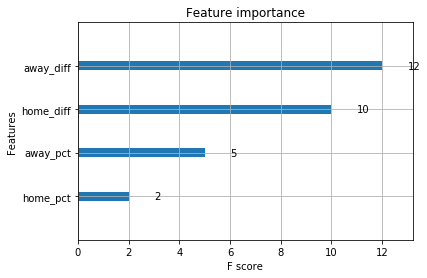

In [7]:
xgb.plot_importance(bst)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

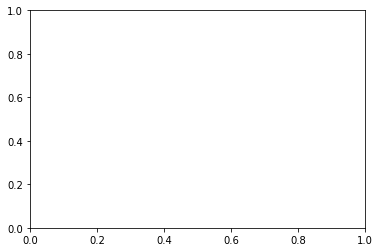

In [8]:
xgb.plot_tree(bst, num_trees=2)